# Линейная регрессия

In [53]:
import matplotlib.pyplot as plt
from mysteryFunctions import mysteryFunctionTwo

In [54]:
# Параметры для рисования
plt.rcParams['figure.figsize'] = (16,12)
# Шрифт надписей к графикам
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }

<function matplotlib.pyplot.show(*args, **kw)>

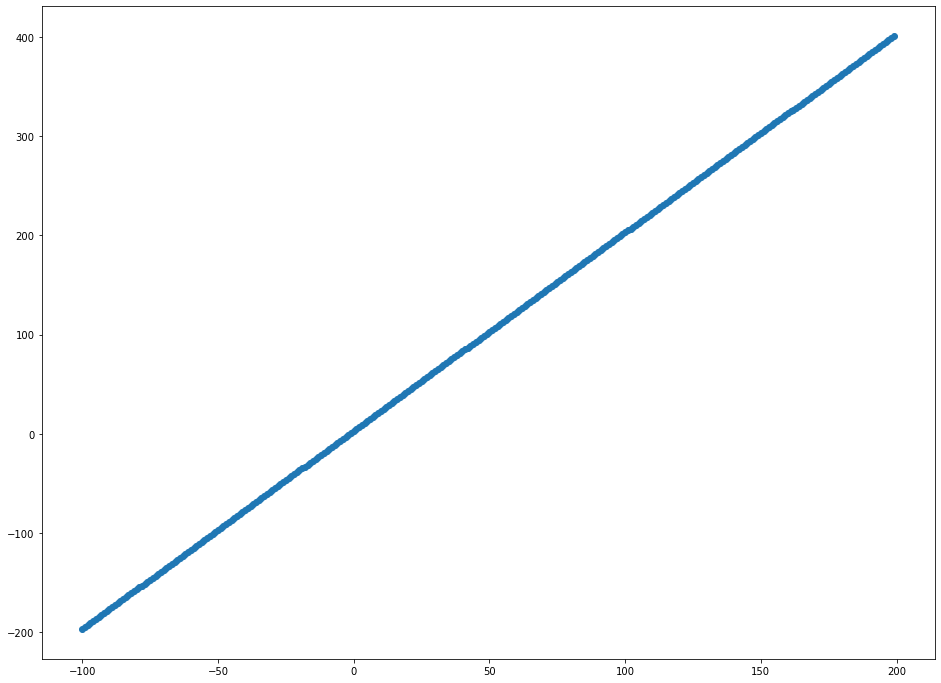

In [55]:
# Создадим input список
input = list(range(-100,200))

result = mysteryFunctionTwo(input)

plt.scatter(input, result)
plt.show

Новая функция на реальных значениях mysteryFunctionSmall с небольшим шумом

<function matplotlib.pyplot.show(*args, **kw)>

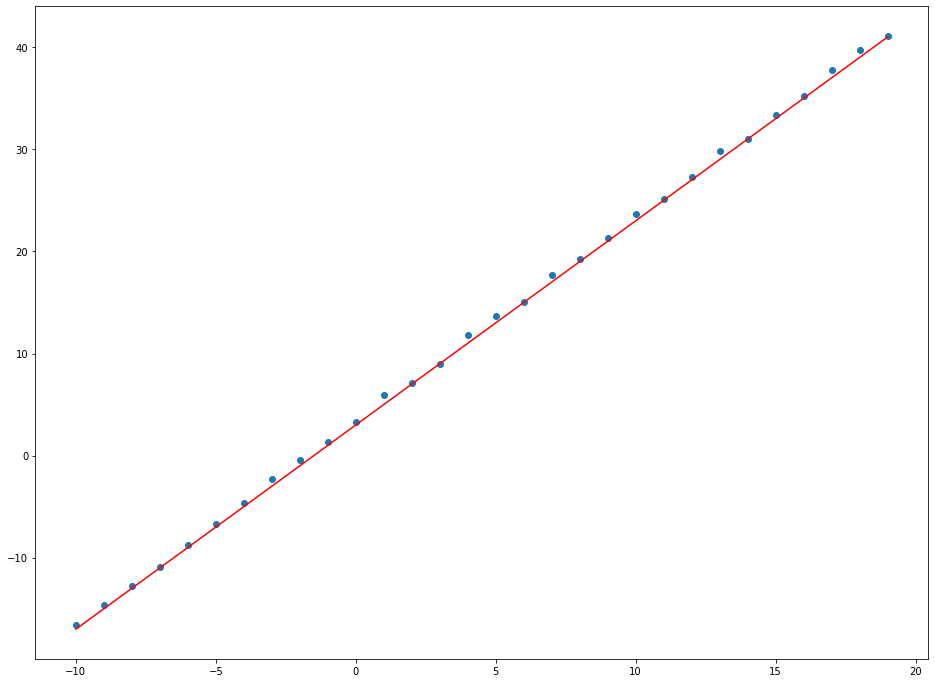

In [56]:
from mysteryFunctions import mysteryFunctionSmall
# Создадим input список
input = list(range(-10,20))

result = mysteryFunctionSmall(input)  # Функция на реальных значениях с небольшим шумом
math_function = mysteryFunctionTwo(input) # Функция математически рассчитанная

plt.scatter(input, result)
plt.plot(input, math_function, 'r')

plt.show

Из графика видно, что реальные значения функции отличаются от чисто математически спрогнозированной (рассчитанной) функции.

In [57]:
import numpy as np

Xactual = np.array(input)
Yactual = np.array(result)

denominator = Xactual.dot(Xactual) - Xactual.mean() * Xactual.sum()
m = (Xactual.dot(Yactual) - Yactual.mean() * Xactual.sum()) / denominator
b = (Yactual.mean() * Xactual.dot(Xactual) - Xactual.dot(Yactual) * Xactual.mean()) / denominator

print(m, b)

2.0019811649661388 3.3894889030974515


Полученные значения "m" и "b" очень близки к "m" и "b" (2, 3) из функции "mysteryFunctionTwo", но отличаются от них т.к. в функции "mysteryFunctionSmall" присутствует шум как бывает в реальных данных.
* * * 

<function matplotlib.pyplot.show(*args, **kw)>

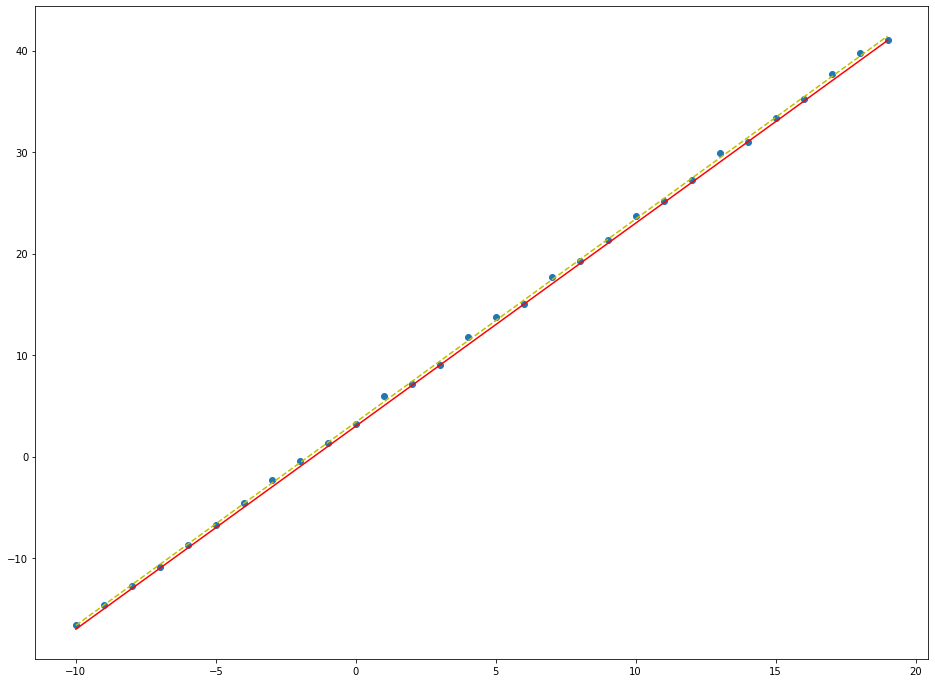

In [58]:

Ypredicted = m*Xactual + b
plt.scatter(input, result)  # Реальные данные (функция)
plt.plot(input, Ypredicted, 'y--')  # Апроксимация на основе подсчета реальной функции и шума
plt.plot(input, math_function, 'r')  # Математическая модель

plt.show

* * *
Новая функция на реальных значениях mysteryFunctionLarge с большим шумом

<function matplotlib.pyplot.show(*args, **kw)>

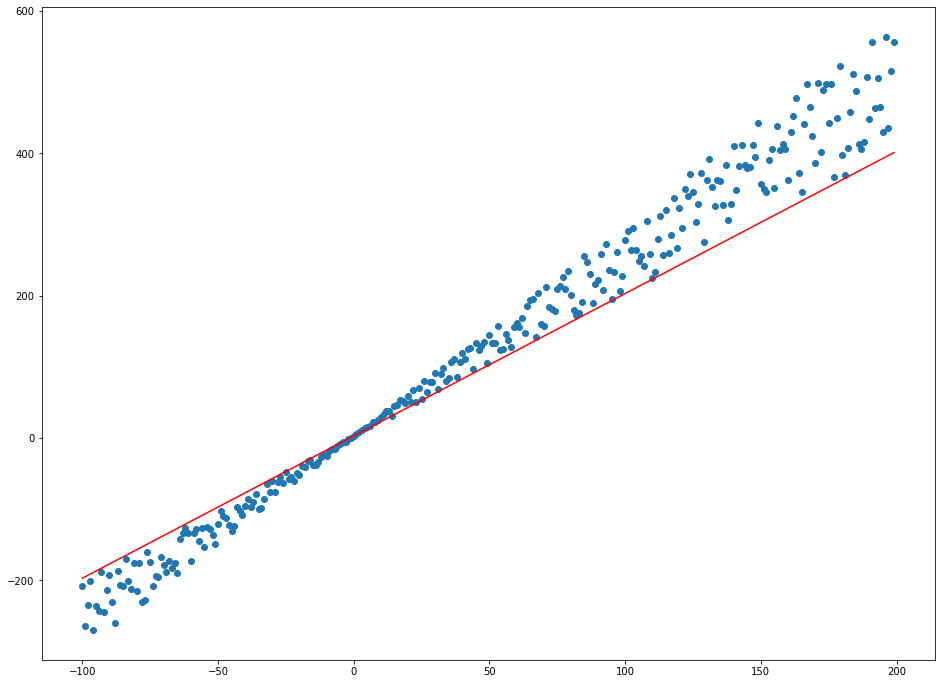

In [59]:
from mysteryFunctions import mysteryFunctionLarge
# Создадим input список
input = list(range(-100,200))

result = mysteryFunctionLarge(input)  # Функция на реальных значениях с большим шумом
math_function = mysteryFunctionTwo(input) # Функция математически рассчитанная

plt.scatter(input, result)  # Функция на реальных значениях с большим шумом
plt.plot(input, math_function, 'r')  # Функция математически рассчитанная (чистая, без шума)

plt.show

<function matplotlib.pyplot.show(*args, **kw)>

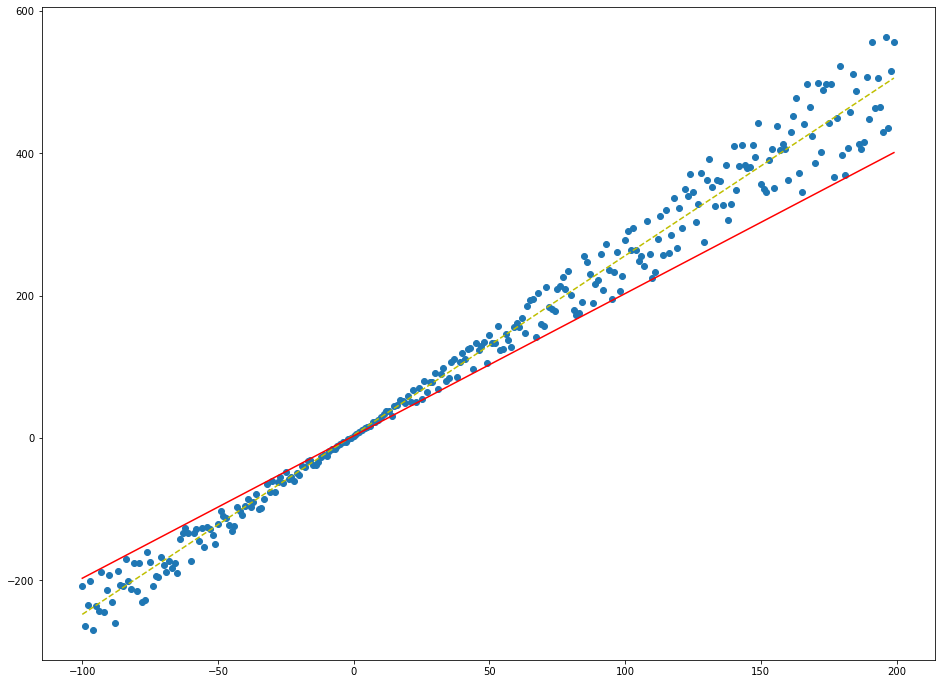

In [60]:
Xactual = np.array(input)
Yactual = np.array(result)

denominator = Xactual.dot(Xactual) - Xactual.mean() * Xactual.sum()
m = (Xactual.dot(Yactual) - Yactual.mean() * Xactual.sum()) / denominator
b = (Yactual.mean() * Xactual.dot(Xactual) - Xactual.dot(Yactual) * Xactual.mean()) / denominator

Ypredicted = m*Xactual + b
plt.scatter(input, result)  # Реальные данные (функция)
plt.plot(input, Ypredicted, 'y--')  # Апроксимация на основе подсчета реальной функции и шума
plt.plot(input, math_function, 'r')  # Математическая модель

plt.show

Определяем как сильно отличаются реальные значения от наших выверенных (от нашего предикта (прогноза))

In [61]:
# r2 для нашего прогноза
pred_diff = Yactual - Ypredicted
avg_diff = Yactual - Yactual.mean()
r2 = 1 - (pred_diff.dot(pred_diff) / avg_diff.dot(avg_diff))
print('R2 для нашей прогнозной модели будет:', r2)

R2 для нашей прогнозной модели будет: 0.9850010600241618


Определяем как сильно отличаются реальные значения от чистой математической модели

In [62]:
# r2 для математической модели
Ymath = np.array(math_function)
pred_diff = Yactual - Ymath
avg_diff = Yactual - Ymath.mean()
r2 = 1 - (pred_diff.dot(pred_diff) / avg_diff.dot(avg_diff))
print('R2 для нашей математической модели будет:', r2)

R2 для нашей математической модели будет: 0.9290690929344152


* * *
## Теперь линейную регрессию сделаем с помощью библиотек Python

In [63]:
from sklearn import linear_model
from sklearn.metrics import r2_score

In [64]:
print(f'Наши собственные параметры для сета данных:\n{m=}, b:{b=}')

Наши собственные параметры для сета данных:
m=2.519918404673089, b:b=4.25715372783462


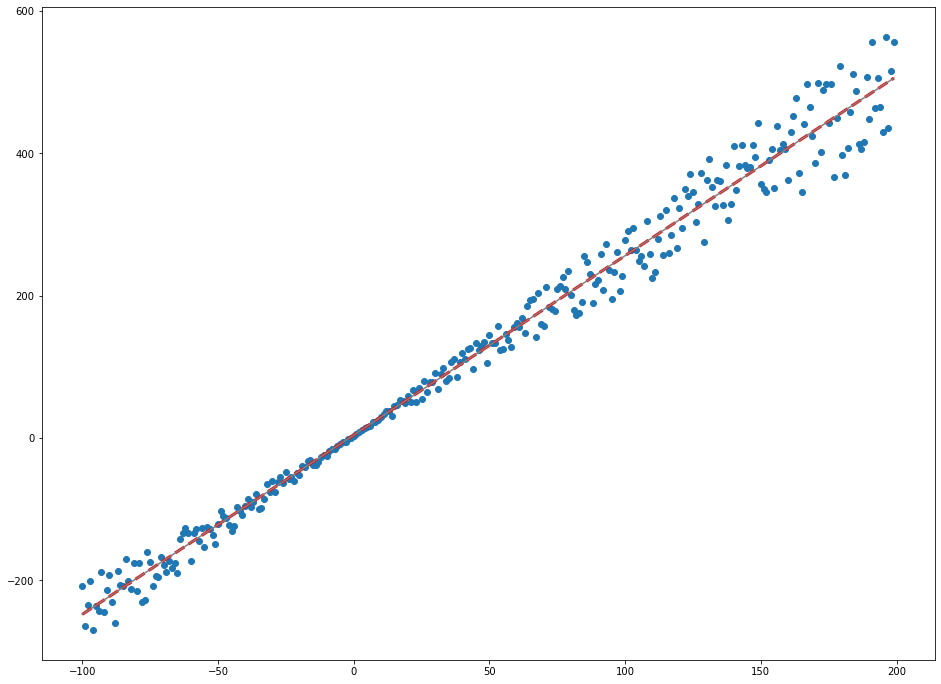

In [65]:
Ypredicted = m*Xactual + b
plt.scatter(input, result)  # Реальные данные (функция)
plt.plot(input, Ypredicted, 'r--', linewidth=3)  # Апроксимация на основе подсчета реальной функции и шума (сами считали)

regr = linear_model.LinearRegression()
Xtrain = Xactual.reshape(len(Xactual), 1)
Ytrain = Yactual.reshape(len(Yactual), 1)
# print(f'{Xactual=}, {Xtrain=}')

regr.fit(Xtrain, Ytrain)
Yeasypredicted = regr.predict(Xtrain)
plt.plot(Xtrain, Yeasypredicted, color='grey')  # Апроксимация на основе подсчета реальной функции и шума (sklearn считал)
plt.show()

Серая линия абсолютно совпадает с красной пунктироной. Линейная регрессия посчитанная нами абсолютно совпала с тем что подсчитал пакет sklearn.

In [68]:
r2easy = r2_score(Ytrain, Yeasypredicted)
print(f'R2 изи,изи синк эбаут ит: {r2easy}')

R2 изи,изи синк эбаут ит: 0.9850010600241618


R2 также абсолютно совпадают